In [1]:
# Prompt Chaining - here we will have two LLM calling
# Let say from the user topic we have to develop the essay. But we can't directly jump into the essay
# We have to create the outline and from the outline will generate the essay
# Here we will use the two LLM - one LLM call for outline and another call of LLM for the essay
# Author: Muhammad Humayun Khan

from langgraph.graph import StateGraph,START,END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

In [2]:
# load the key and model
load_dotenv()
model = ChatOpenAI()

In [3]:
# initial state
class Essay(TypedDict):
    input_title: str
    outline: str
    essay:str

In [4]:
# function to get the outline from the title
def outline_func(state:Essay) -> Essay:
    title = state['input_title']
    prompt = f'Generate outline on the user title {title}'
    outline = model.invoke(prompt).content

    state['outline'] = outline

    return state

# function to get the essay from the outline and title
def essay_func(state:Essay) -> Essay:
    title = state['input_title']
    outline = state['outline']

    prompt = f'Generate essay from the title {title} using outline {outline}'
    essay = model.invoke(prompt).content

    state['essay'] = essay
    return state

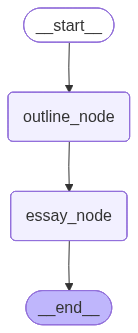

In [ ]:
# lets create the graph - nodes and edges 
graph = StateGraph(Essay)

graph.add_node('outline_node',outline_func)
graph.add_node('essay_node',essay_func)

graph.add_edge(START,'outline_node')
graph.add_edge('outline_node','essay_node')
graph.add_edge('essay_node',END)

# compile the graph
graph.compile()

In [7]:
result = graph.compile()

# execute the graph
initial_input_title = {'input_title':"Possibility of success on switching field at 37 to IT field?"}
final_output = result.invoke(initial_input_title)
print(final_output)


{'input_title': 'Possibility of success on switching field at 37 to IT field?', 'outline': 'I. Introduction \n    A. Overview of the topic \n    B. Importance of considering a career change at 37 \n    C. Brief discussion of the IT field \n\nII. Factors to Consider Before Making a Career Change \n    A. Personal and professional goals \n    B. Transferable skills and experience \n    C. Educational and certification requirements \n    D. Market demand in the IT field \n    E. Job outlook and salary potential \n\nIII. Steps to Transitioning into the IT Field \n    A. Research and self-assessment \n    B. Networking and connecting with professionals in the field \n    C. Upskilling and obtaining necessary certifications \n    D. Building a strong resume and portfolio \n    E. Gaining practical experience through internships or volunteer work \n\nIV. Challenges and Potential Obstacles to Overcome \n    A. Ageism and discrimination \n    B. Lack of formal education or experience in the IT 

In [8]:
print(final_output['outline'])

I. Introduction 
    A. Overview of the topic 
    B. Importance of considering a career change at 37 
    C. Brief discussion of the IT field 

II. Factors to Consider Before Making a Career Change 
    A. Personal and professional goals 
    B. Transferable skills and experience 
    C. Educational and certification requirements 
    D. Market demand in the IT field 
    E. Job outlook and salary potential 

III. Steps to Transitioning into the IT Field 
    A. Research and self-assessment 
    B. Networking and connecting with professionals in the field 
    C. Upskilling and obtaining necessary certifications 
    D. Building a strong resume and portfolio 
    E. Gaining practical experience through internships or volunteer work 

IV. Challenges and Potential Obstacles to Overcome 
    A. Ageism and discrimination 
    B. Lack of formal education or experience in the IT field 
    C. Transitioning from a stable career to a new industry 
    D. Balancing work and family responsibili

In [9]:
print(final_output['essay'])

Possibility of success on switching field at 37 to IT field

I. Introduction 
A. Overview of the topic: Making a career change at the age of 37 to the IT field 
B. Importance of considering a career change at 37: Reinventing oneself and exploring new opportunities 
C. Brief discussion of the IT field: Growing field with high demand for skilled professionals 

II. Factors to Consider Before Making a Career Change 
A. Personal and professional goals: Determine what you want to achieve in your new career 
B. Transferable skills and experience: Identify skills from previous job that can be applied in IT 
C. Educational and certification requirements: Understand the qualifications needed in the IT field 
D. Market demand in the IT field: Research the job market and identify in-demand IT skills 
E. Job outlook and salary potential: Evaluate the potential growth and earning opportunities in IT 

III. Steps to Transitioning into the IT Field 
A. Research and self-assessment: Understand the dif